Loaded 1000 samples from ../datasets_longT/euler_data_1000s_64nx_300nt.pkl
--- Sample 1 ---


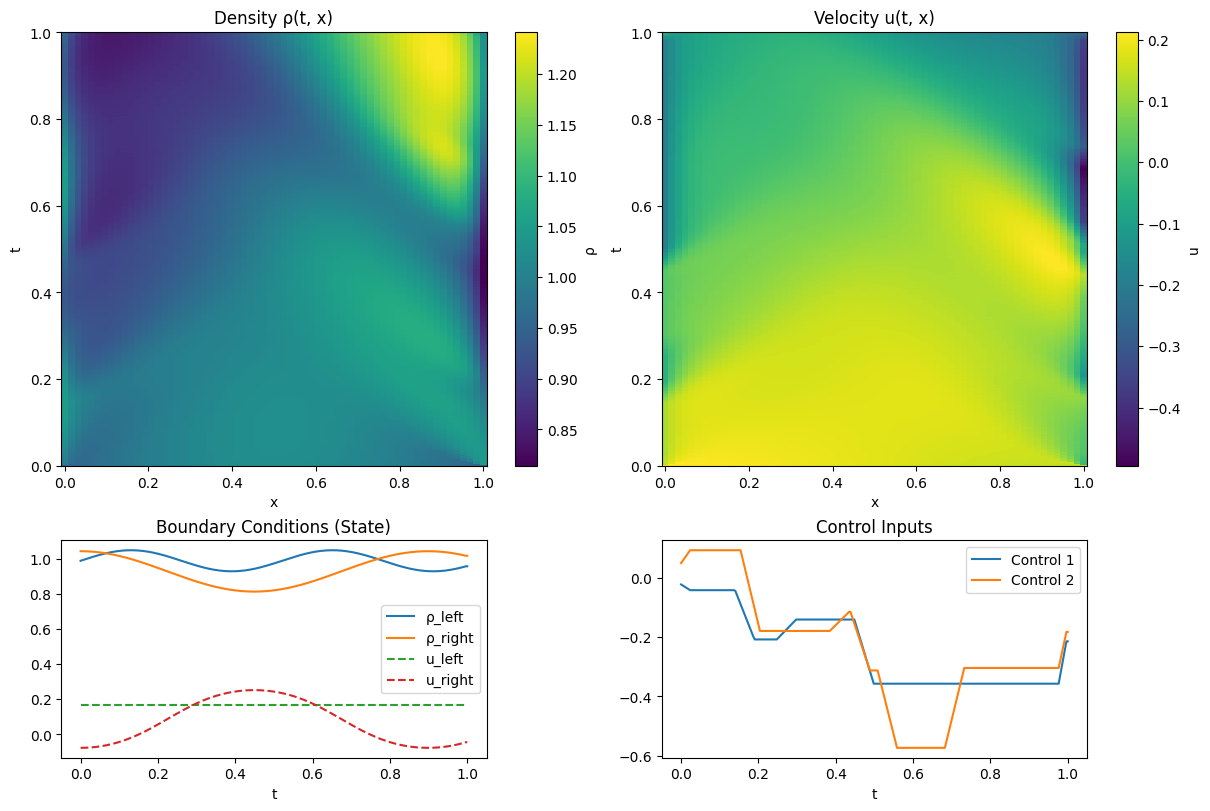

--- Sample 2 ---


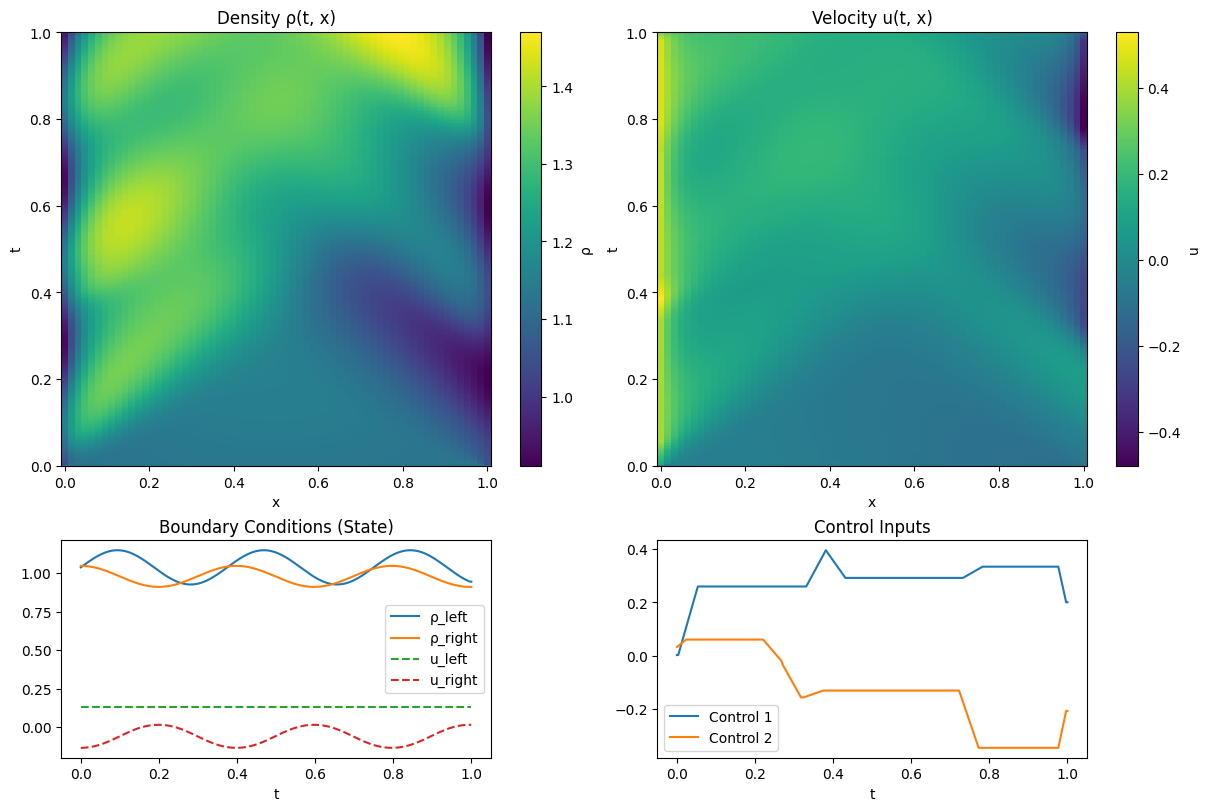

--- Sample 3 ---


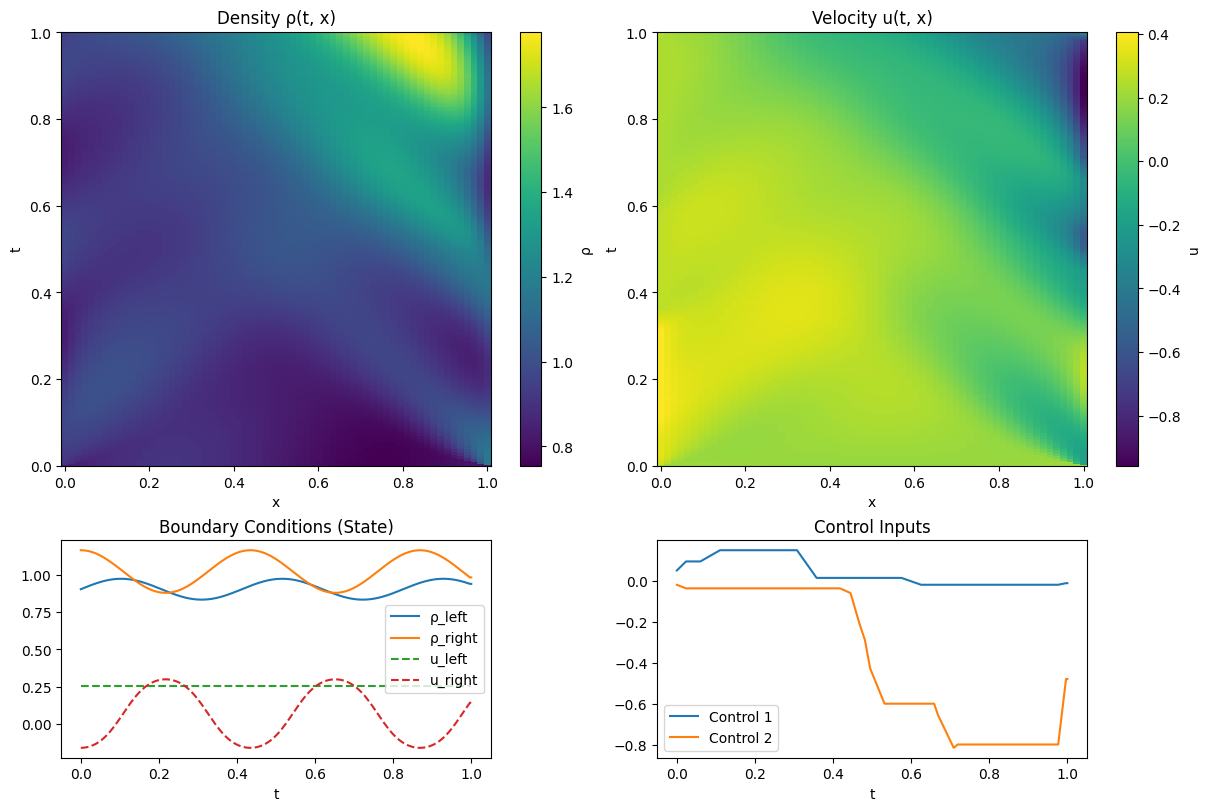

In [1]:
# %% [markdown]
# # PDE Dataset Visualization Notebook
#
# 该 Notebook 自动识别数据集类型（Advection/Burgers、Euler、Darcy），并绘制对应的可视化：
# 1. **Advection/Burgers** 与 **Darcy**：1 个解的时空热图 + 边界状态/控制输入曲线  
# 2. **Euler**：密度和速度各 1 个时空热图 + 边界状态/控制输入曲线  

# %% code
import pickle
import numpy as np
import matplotlib.pyplot as plt

# %% code
# —— 修改为你的 pickle 数据文件路径 —— 
#dataset_path = "../datasets/advection_data_1000s_64nx_300nt.pkl"
#dataset_path = "../datasets/burgers_data_1000s_64nx_300nt.pkl"
#dataset_path = "../datasets/euler_data_1000s_64nx_300nt.pkl"
#dataset_path = "../datasets/darcy_data_1000s_64nx_300nt.pkl"
dataset_path = "../datasets_longT/advection_data_1000s_64nx_3000nt.pkl"
dataset_path = "../datasets_longT/euler_data_1000s_64nx_300nt.pkl"

# 加载数据
with open(dataset_path, "rb") as f:
    data_list = pickle.load(f)
print(f"Loaded {len(data_list)} samples from {dataset_path}")

# %% code
def plot_sample(sample, figsize=(12, 8)):
    """
    自动识别 sample 类型并绘图：
    - Advection/Burgers ('U') 或 Darcy ('P'): 1 个解热图 + BC/Control 曲线
    - Euler ('rho' + 'u'): 2 个解热图 + BC/Control 曲线
    """
    # 读取公共量
    params = sample.get("params", {})
    nt = params.get("nt", sample.get("U", sample.get("rho", sample.get("P", np.zeros((0,))))) .shape[0])
    t_vals = np.linspace(0, params.get("T", 1.0), nt)

    # 分支：Euler 数据集
    if ("rho" in sample) and ("u" in sample):
        rho = sample["rho"]  # (nt, nx)
        u   = sample["u"]    # (nt, nx)
        BC_state   = sample["BC_State"]   # (nt, 4): [rho_l, u_l, rho_r, u_r]
        BC_control = sample["BC_Control"] # (nt, nc)

        nx = rho.shape[1]
        x = np.linspace(0, params.get("L", 1.0), nx)

        fig = plt.figure(constrained_layout=True, figsize=figsize)
        gs = fig.add_gridspec(2, 2, height_ratios=[2, 1])

        # rho 热图
        ax0 = fig.add_subplot(gs[0, 0])
        im0 = ax0.pcolormesh(x, t_vals, rho, shading="auto")
        fig.colorbar(im0, ax=ax0, label="ρ")
        ax0.set_title("Density ρ(t, x)")
        ax0.set_xlabel("x"); ax0.set_ylabel("t")

        # u 热图
        ax1 = fig.add_subplot(gs[0, 1])
        im1 = ax1.pcolormesh(x, t_vals, u, shading="auto")
        fig.colorbar(im1, ax=ax1, label="u")
        ax1.set_title("Velocity u(t, x)")
        ax1.set_xlabel("x"); ax1.set_ylabel("t")

        # 边界状态
        ax2 = fig.add_subplot(gs[1, 0])
        ax2.plot(t_vals, BC_state[:, 0], label="ρ_left")
        ax2.plot(t_vals, BC_state[:, 2], label="ρ_right")
        ax2.plot(t_vals, BC_state[:, 1], "--", label="u_left")
        ax2.plot(t_vals, BC_state[:, 3], "--", label="u_right")
        ax2.set_title("Boundary Conditions (State)")
        ax2.set_xlabel("t"); ax2.legend(loc="best")

        # 控制输入
        ax3 = fig.add_subplot(gs[1, 1])
        for k in range(BC_control.shape[1]):
            ax3.plot(t_vals, BC_control[:, k], label=f"Control {k+1}")
        ax3.set_title("Control Inputs")
        ax3.set_xlabel("t"); ax3.legend(loc="best")

        plt.show()
        return

    # 分支：Advection/Burgers ('U') 或 Darcy ('P')
    field_key = "U" if ("U" in sample) else "P" if ("P" in sample) else None
    if field_key:
        data = sample[field_key]          # shape (nt, nx) or (nt, N)
        BC_state   = sample["BC_State"]   # shape (nt, 2)
        BC_control = sample["BC_Control"] # shape (nt, nc)
        nx = data.shape[1]
        x = np.arange(nx)

        fig = plt.figure(constrained_layout=True, figsize=figsize)
        gs = fig.add_gridspec(2, 2, height_ratios=[2, 1])

        # 解的热图
        ax0 = fig.add_subplot(gs[0, :])
        im = ax0.pcolormesh(x, t_vals, data, shading="auto")
        cb = fig.colorbar(im, ax=ax0, label=field_key)
        ax0.set_title(f"Solution {field_key}(t, x_index)")
        ax0.set_xlabel("spatial index"); ax0.set_ylabel("t")

        # 边界状态
        ax1 = fig.add_subplot(gs[1, 0])
        ax1.plot(t_vals, BC_state[:, 0], label="BC_left")
        ax1.plot(t_vals, BC_state[:, 1], label="BC_right")
        ax1.set_title("Boundary Conditions (State)")
        ax1.set_xlabel("t"); ax1.legend(loc="best")

        # 控制输入
        ax2 = fig.add_subplot(gs[1, 1])
        for k in range(BC_control.shape[1]):
            ax2.plot(t_vals, BC_control[:, k], label=f"Control {k+1}")
        ax2.set_title("Control Inputs")
        ax2.set_xlabel("t"); ax2.legend(loc="best")

        plt.show()
        return

    # 未识别类型
    raise ValueError("Unrecognized sample format!")

# %% code
# 演示：可视化前 3 个样本
for i, sample in enumerate(data_list[:3]):
    print(f"--- Sample {i+1} ---")
    plot_sample(sample)

Loaded 10000 samples.


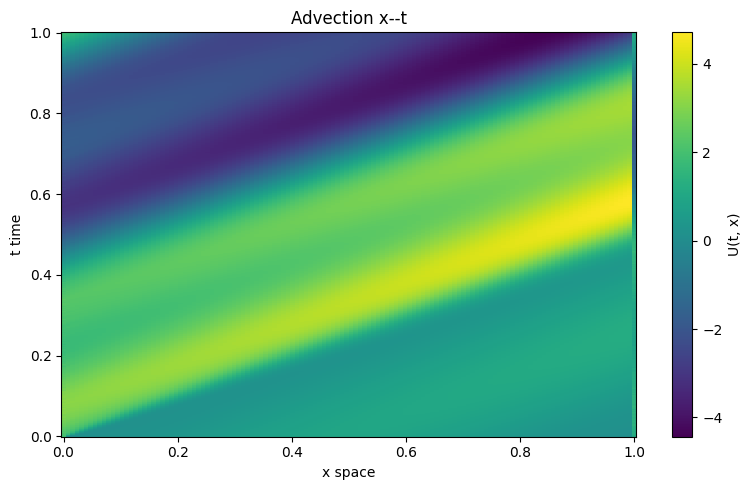

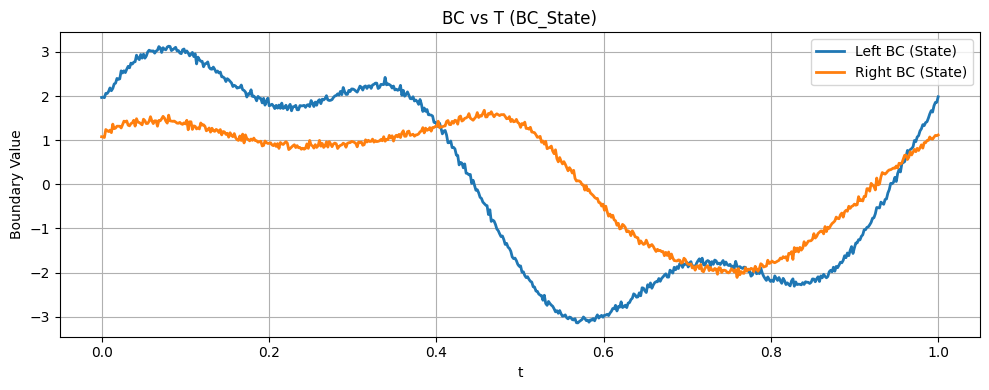

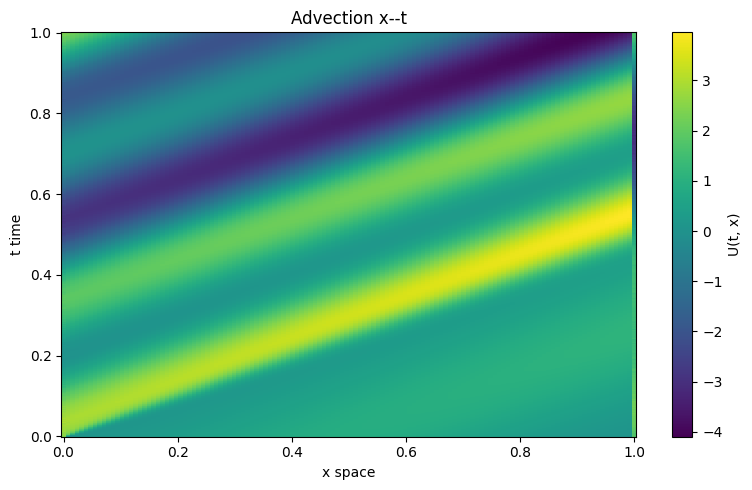

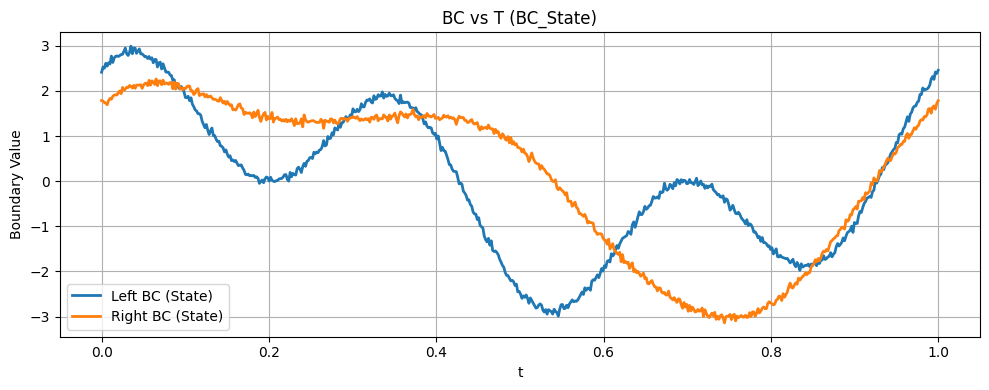

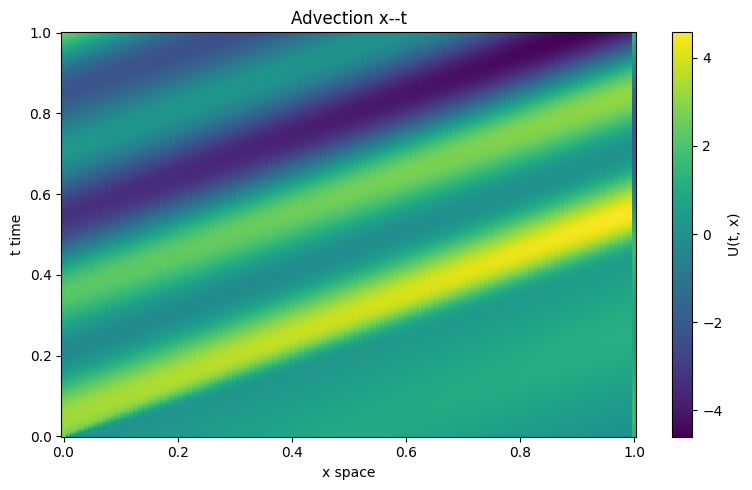

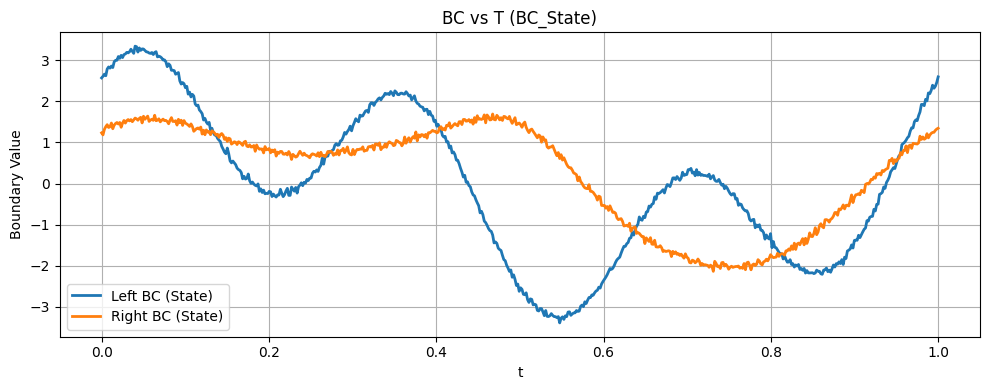

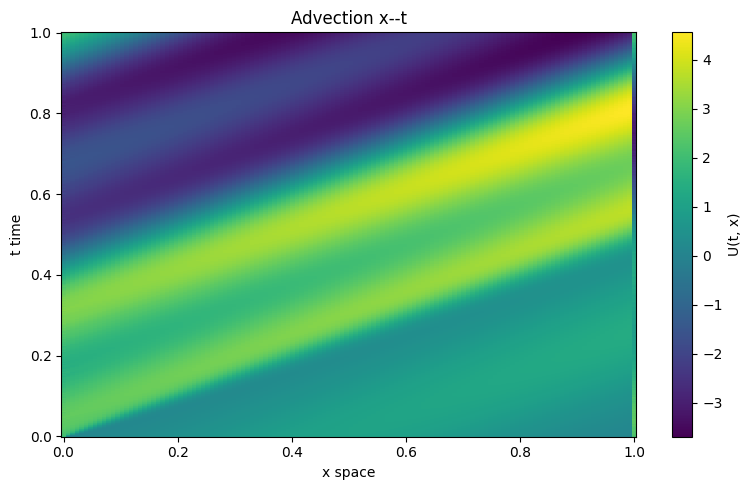

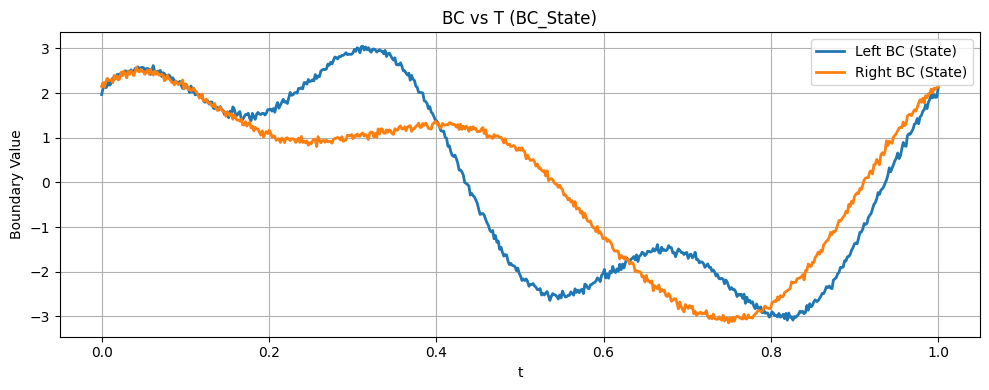

In [3]:
import pickle

with open('../datasets_full/advection_data_10000s_128nx_600nt.pkl', 'rb') as f:
    dataset = pickle.load(f)

print(f"Loaded {len(dataset)} samples.")
import matplotlib.pyplot as plt
import numpy as np

# 取第一个样本
for i in range(4):
    sample = dataset[i]
    U = sample['U']  # shape: [nt, nx]
    BC_state = sample['BC_State']  # [nt, 2]
    params = sample['params']
    
    nt, nx = U.shape
    T = params['T']
    L = params['L']
    
    x = np.linspace(0, L, nx)
    t = np.linspace(0, 1, nt)
    
    # 创建时空网格（用于 pcolormesh）
    X, T_grid = np.meshgrid(x, t)
    
    plt.figure(figsize=(8, 5))
    plt.pcolormesh(X, T_grid, U, shading='auto', cmap='viridis')
    plt.colorbar(label='U(t, x)')
    plt.xlabel('x space')
    plt.ylabel('t time')
    plt.title('Advection x--t')
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 4))
    plt.plot(t, BC_state[:, 0], label='Left BC (State)', linewidth=2)
    plt.plot(t, BC_state[:, 1], label='Right BC (State)', linewidth=2)
    plt.xlabel('t')
    plt.ylabel('Boundary Value')
    plt.title('BC vs T (BC_State)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Loaded 10000 samples.


/tmp/ipykernel_3451/3162222740.py:26: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:26: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:26: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:26: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:26: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:26: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:26: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  plt.tight_l

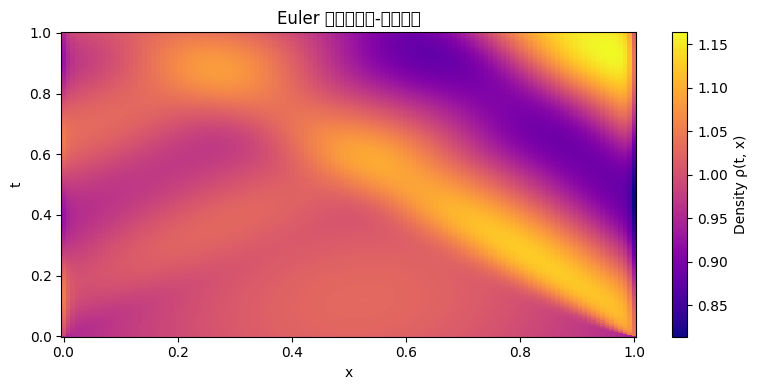

/tmp/ipykernel_3451/3162222740.py:34: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:34: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:34: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:34: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:34: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:34: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3451/3162222740.py:34: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  plt.tight_l

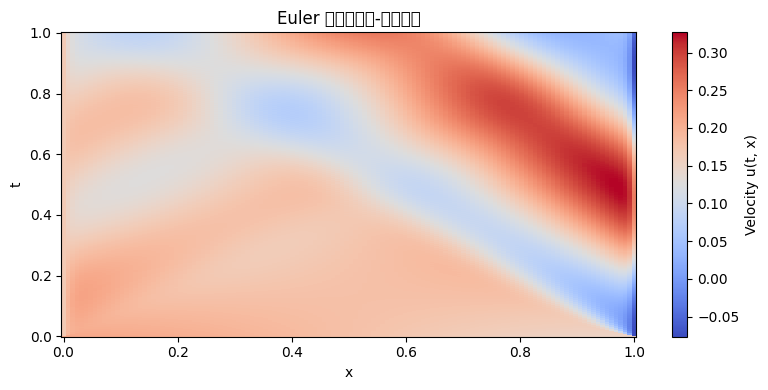

/tmp/ipykernel_3451/3162222740.py:44: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/3162222740.py:44: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/3162222740.py:44: UserWarning: Glyph 29366 (\N{CJK UNIFIED IDEOGRAPH-72B6}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/3162222740.py:44: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/3162222740.py:44: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/3162222740.py:44: UserWarning: Glyph 26102 (\N{CJK

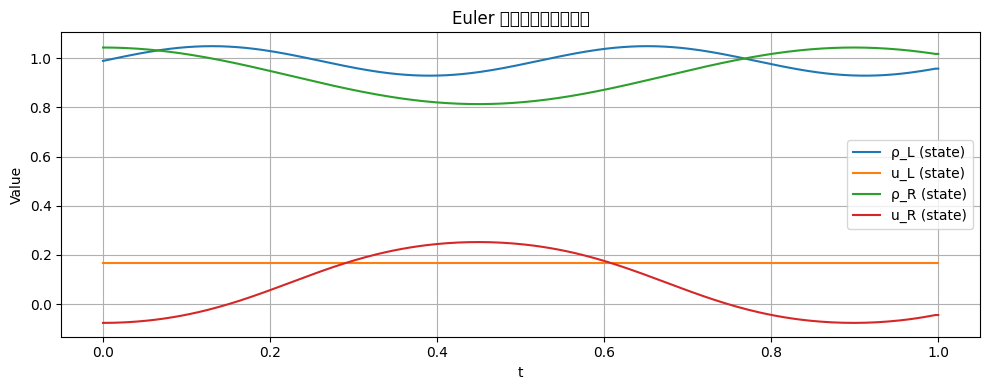

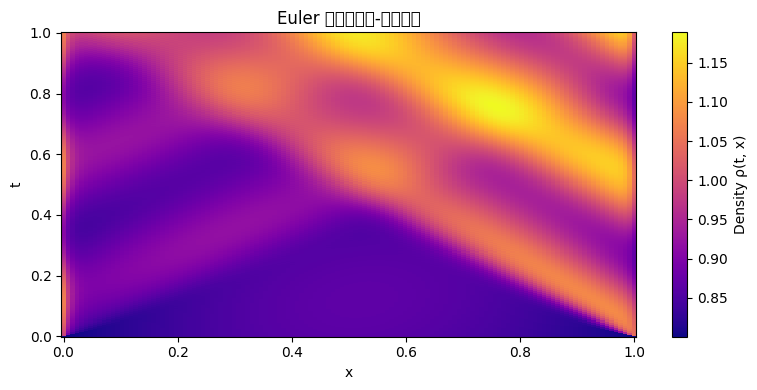

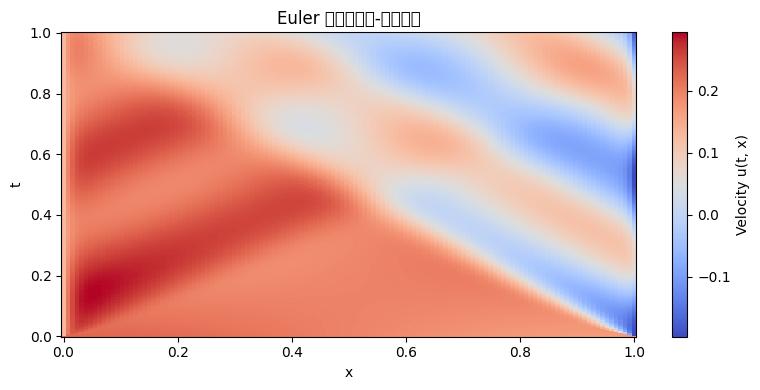

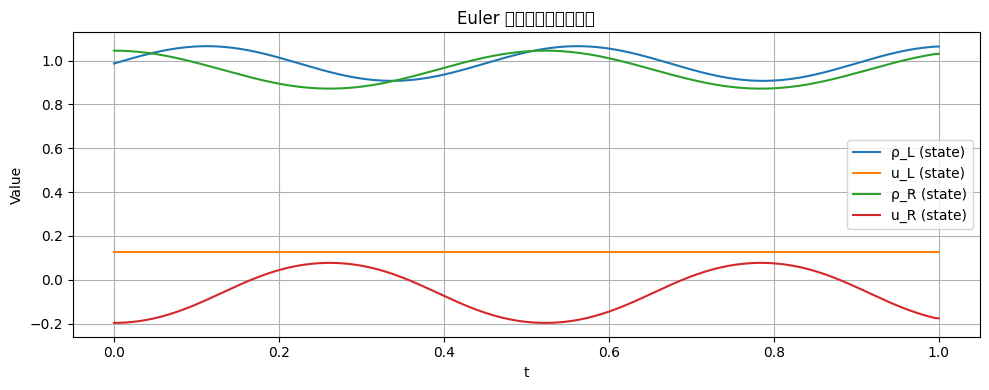

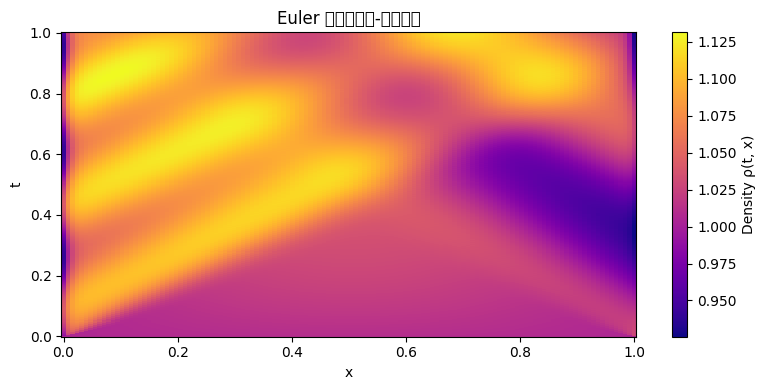

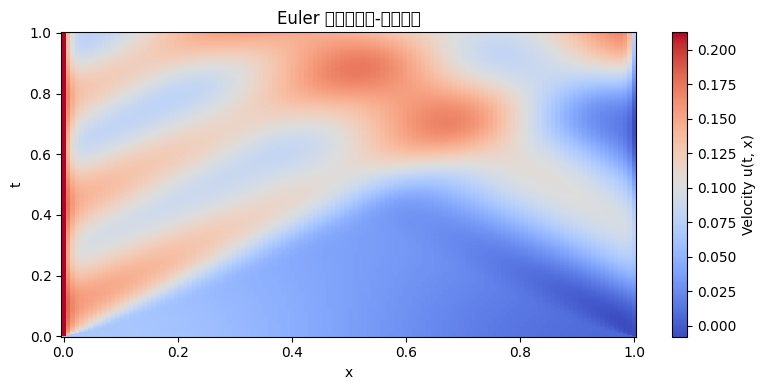

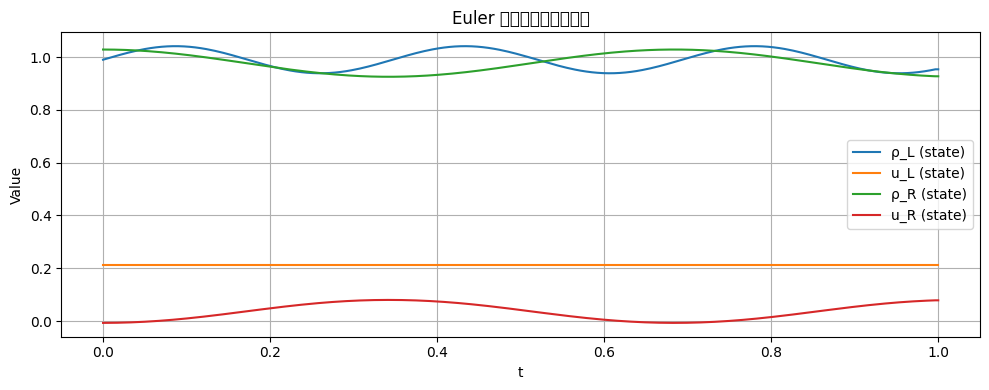

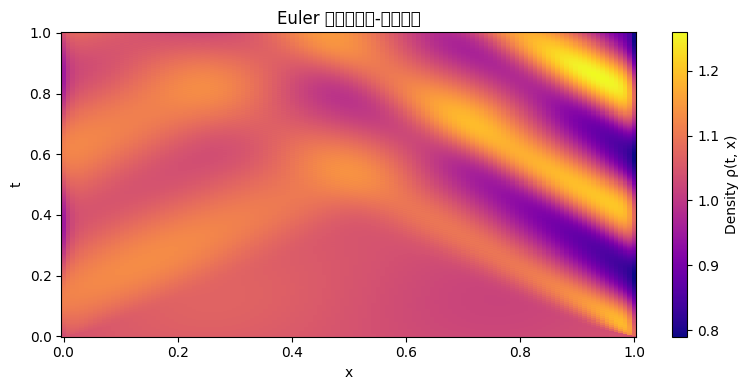

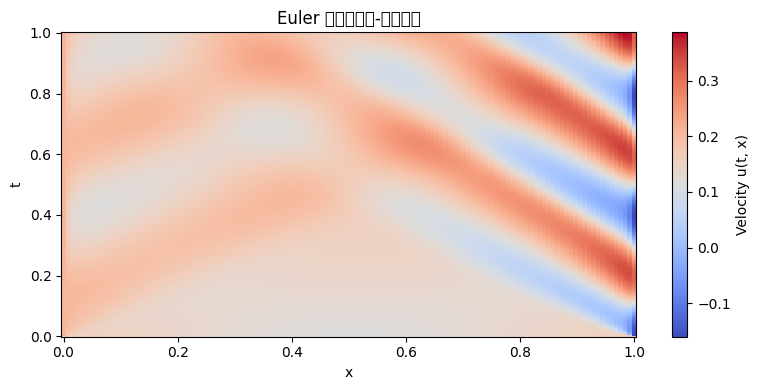

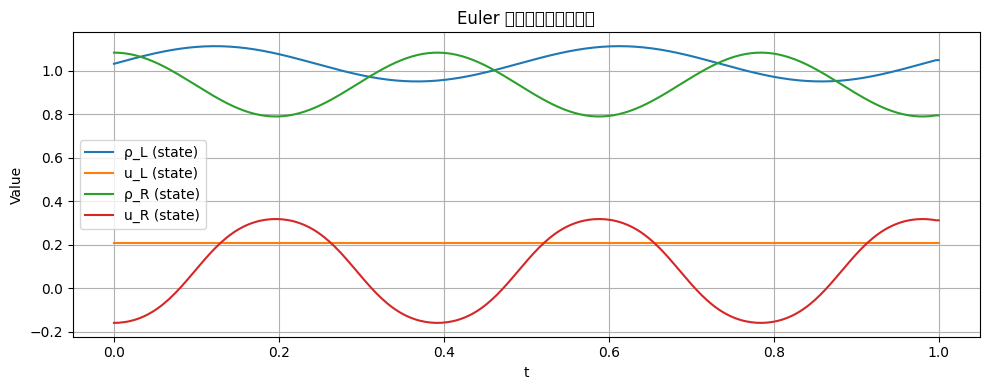

In [5]:
import pickle

with open('../datasets_full/euler_data_10000s_128nx_600nt.pkl', 'rb') as f:
    dataset = pickle.load(f)

print(f"Loaded {len(dataset)} samples.")
import matplotlib.pyplot as plt
import numpy as np
for i in range(4):
    sample = dataset[i]
    rho = sample['rho']  # 密度 [nt, nx]
    u = sample['u']      # 速度 [nt, nx]
    BC_state = sample['BC_State']  # shape: [nt, 4] (ρ_L, u_L, ρ_R, u_R)
    params = sample['params']
    
    nt, nx = rho.shape
    x = np.linspace(0, params['L'], nx)
    t = np.linspace(0, params['T'], nt)
    X, T_grid = np.meshgrid(x, t)
    
    # 可视化密度
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(X, T_grid, rho, shading='auto', cmap='plasma')
    plt.colorbar(label='Density ρ(t, x)')
    plt.xlabel('x'); plt.ylabel('t'); plt.title('Euler 密度随空间-时间演化')
    plt.tight_layout()
    plt.show()
    
    # 可视化速度
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(X, T_grid, u, shading='auto', cmap='coolwarm')
    plt.colorbar(label='Velocity u(t, x)')
    plt.xlabel('x'); plt.ylabel('t'); plt.title('Euler 速度随空间-时间演化')
    plt.tight_layout()
    plt.show()
    
    # 边界状态可视化
    plt.figure(figsize=(10, 4))
    plt.plot(t, BC_state[:, 0], label='ρ_L (state)')
    plt.plot(t, BC_state[:, 1], label='u_L (state)')
    plt.plot(t, BC_state[:, 2], label='ρ_R (state)')
    plt.plot(t, BC_state[:, 3], label='u_R (state)')
    plt.xlabel('t'); plt.ylabel('Value'); plt.title('Euler 边界状态随时间变化')
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

Loaded 10000 samples.


/tmp/ipykernel_3451/993534926.py:23: UserWarning: Glyph 21387 (\N{CJK UNIFIED IDEOGRAPH-538B}) missing from current font.
  plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:23: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:23: UserWarning: Glyph 22330 (\N{CJK UNIFIED IDEOGRAPH-573A}) missing from current font.
  plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:23: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:23: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from current font.
  plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:23: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:23: UserWarning: Glyph 26102 (\N{CJK 

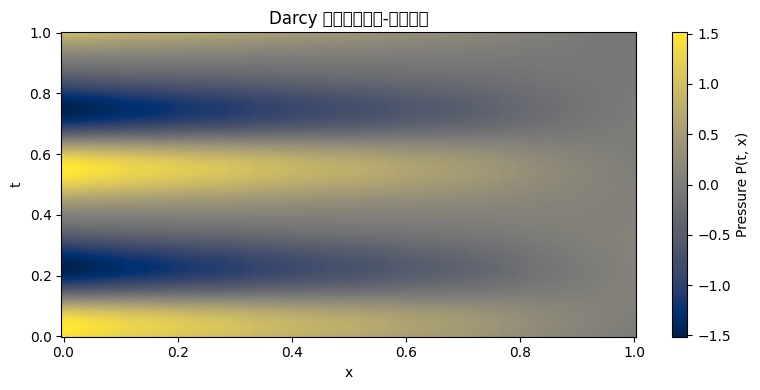

/tmp/ipykernel_3451/993534926.py:29: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:29: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:29: UserWarning: Glyph 29366 (\N{CJK UNIFIED IDEOGRAPH-72B6}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:29: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:29: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
/tmp/ipykernel_3451/993534926.py:29: UserWarning: Glyph 26102 (\N{CJK UNIFI

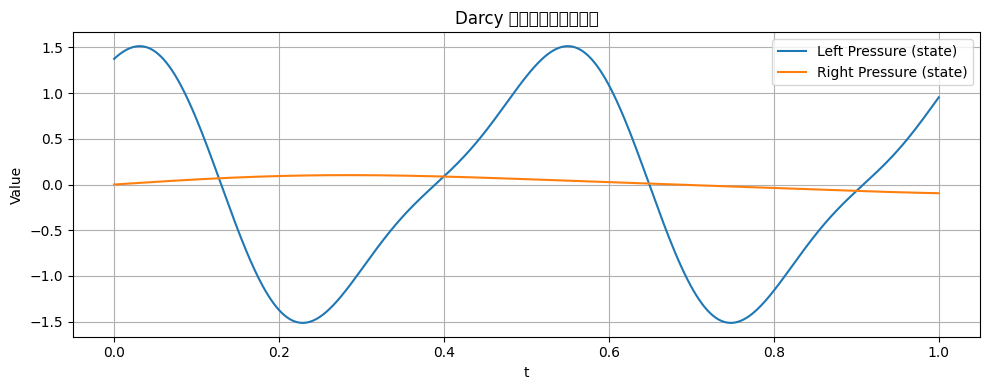

In [6]:
import pickle

with open('../datasets_full/darcy_data_10000s_128nx_600nt.pkl', 'rb') as f:
    dataset = pickle.load(f)

print(f"Loaded {len(dataset)} samples.")
import matplotlib.pyplot as plt
import numpy as np
sample = dataset[0]
P = sample['P']  # 压力解 [nt, nx]
BC_state = sample['BC_State']  # [nt, 2]
params = sample['params']

nt, nx = P.shape
x = np.linspace(0, 1.0, nx)
t = np.linspace(0, 1.0, nt)
X, T_grid = np.meshgrid(x, t)

plt.figure(figsize=(8, 4))
plt.pcolormesh(X, T_grid, P, shading='auto', cmap='cividis')
plt.colorbar(label='Pressure P(t, x)')
plt.xlabel('x'); plt.ylabel('t'); plt.title('Darcy 压力场随空间-时间演化')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t, BC_state[:, 0], label='Left Pressure (state)')
plt.plot(t, BC_state[:, 1], label='Right Pressure (state)')
plt.xlabel('t'); plt.ylabel('Value'); plt.title('Darcy 边界状态随时间变化')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()